In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from picture_text_summary import PictureText



In [58]:
import plotly.graph_objects as go

fig = go.Figure()

In [ ]:
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

In [113]:
corpus=[
    'The cat sits outside',
    'A man is playing guitar',
    'I love pasta',
    'The new movie is awesome',
    'The cat plays in the garden',
    'A woman watches TV',
    'The new movie is so great',
    'Do you like pizza?',
    'Burgers are my favorite',
    'Do you like burgers?',
    'I will have chips with my burger'
       ]


In [127]:
pt = PictureText(corpus)
pt(hac_method='ward',)
pt.make_picture(layer_depth=6,layer_min_size=0.9,layer_max_extension=3)


Embeddings updated, using encoder, time taken 0 secs
Linkage updated, using ward method and euclidean distances, time taken 0 secs
Picture weighted average 1.0


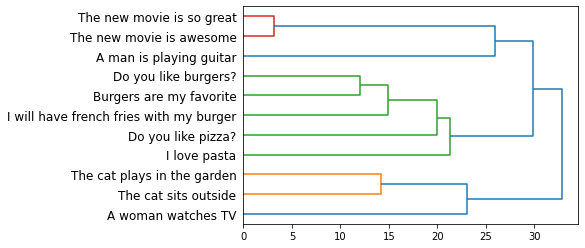

In [115]:
from hac_tools import HAC

hac=HAC(pt.linkage_table)
hac.dendrogram(labels=pt.txt,  orientation='right')


In [118]:
def silly_summarizer(txt,txt_embeddings):
    return "All the same to me", 1
pt.make_picture(summarizer = silly_summarizer,)

In [99]:
pt.linkage_table.shape

(10, 4)

In [100]:
len(pt.txt)

11

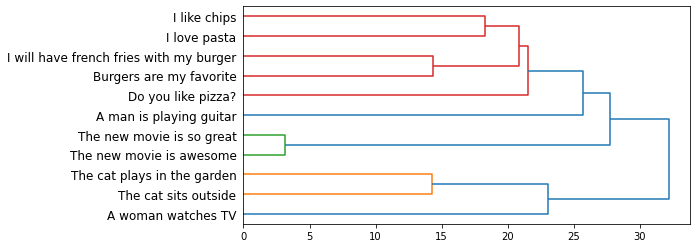

In [111]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
dn = hierarchy.dendrogram(pt.linkage_table, labels=pt.txt,  orientation='right')

In [3]:
import pandas as pd
df = pd.read_csv('../et/data/abcnews-date-text.csv',index_col=0).sample(1000,random_state=10)


/Users/md/opt/anaconda3/envs/hac_viz/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [ ]:
txt = list(df.headline_text.values)



In [77]:
pt = PictureText(txt)

In [79]:
pt()

Embeddings updated, using encoder, time taken 17 secs
Linkage updated, using ward method and euclidean distances, time taken 1 secs


In [81]:
pt.make_picture()

In [8]:
bioarhiv_path='../biorxiv_clean.csv'
bio_df = pd.read_csv(bioarhiv_path, index_col=0,)

In [32]:
bio_df.shape

(1625, 8)

In [36]:
bio_txt=list(bio_df[~bio_df.title.isna()].title.values)
cord_pt = PictureText(bio_txt)
cord_pt()

In [37]:
cord_pt.make_picture()

In [38]:
cord_pt.average_score

0.8633490834174519

# Separate text and embeddings

In this section we will use the CORD dataset paper titles for the visualization but use the embeddings from abstracts for clustering

In [34]:
from picture_text_summary import sbert_encoder

In [43]:
bio_txt_abstract=list(bio_df[~bio_df.title.isna()].fillna('').abstract.values)

In [44]:
bio_txt_abstract_embeddings=sbert_encoder(bio_txt_abstract)

In [48]:
cord_pt(list(bio_txt_abstract_embeddings))

In [49]:
cord_pt.make_picture()

In [50]:
cord_pt.average_score

0.913004568256763